# L08-TimeseriesOpEd

## Author - Rodolfo Lerma

# Abstract:

In this analysis the production trends for the Icecream production in the state of California will be explored.

The analysis is is divided the following way:

### First look at the data:
- **Loading Data**

### Analysis: Icecream Production in California:
- **STL Decomposition of the Variable**
- **Forcasting Time Series**
    - Linear Regression Model
    - ARIMA Model
    - Comparisons

### Summary/conclusions:

In [1]:
#Loading libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy.random as nr
import scipy.stats as ss
import statsmodels.tsa.seasonal as sts
import statsmodels.graphics.tsaplots as splt
import statsmodels.tsa.arima_process as arima
from statsmodels.tsa.stattools import adfuller
import numpy as np

# First look at the data

## Loading Data

In [2]:
#fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv"
fileName = "CADairyProduction.csv"

In [3]:
lactose = pd.read_csv(fileName)

In [4]:
print(lactose.head(4))
print(lactose.tail(4))

   Year Month  Cotagecheese.Prod  Icecream.Prod  Milk.Prod  N.CA.Fat.Price  \
0  1995   Jan              4.370         51.595      2.112          0.9803   
1  1995   Feb              3.695         56.086      1.932          0.8924   
2  1995   Mar              4.538         68.453      2.162          0.8924   
3  1995   Apr              4.280         65.722      2.130          0.8967   

   Month.Count  monthNumSqred  monthNumCubed  
0            1              1              1  
1            2              4              8  
2            3              9             27  
3            4             16             64  
     Year Month  Cotagecheese.Prod  Icecream.Prod  Milk.Prod  N.CA.Fat.Price  \
224  2013   Sep              2.193         74.871      3.197          1.5519   
225  2013   Oct              2.284         70.011      3.338          1.5566   
226  2013   Nov              1.865         61.394      3.275          1.7537   
227  2013   Dec              2.345         53.653     

In [5]:
lactose.dtypes

Year                   int64
Month                 object
Cotagecheese.Prod    float64
Icecream.Prod        float64
Milk.Prod            float64
N.CA.Fat.Price       float64
Month.Count            int64
monthNumSqred          int64
monthNumCubed          int64
dtype: object

Some names will be changed for simplicity reasons:
- `Cotagecheese.Prod` : `Cotage`
- `Icecream.Prod` : `Icecream`
- `Milk.Prod` : `Milk`
- `Month.Count` : `Month_Cnt`
- `monthNumSqred` : `Month_Cnt2`

In [6]:
lactose = lactose.rename(columns={"Cotagecheese.Prod": "Cotage", "Icecream.Prod": "Icecream","Milk.Prod": "Milk","Month.Count": "Month_Cnt","monthNumSqred": "Month_Cnt2"})

In [7]:
#Take a look at the names from the months
lactose['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [8]:
look_up = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5,
            'Jun': 6, 'Jul': 7, 'Aug': 8,  'Sep': 9, 'Oct': 10, 'Nov': 11,'Dec': 12}

`Date` variable is creating by combining `month` & `Year`

In [9]:
lactose['month'] = lactose['Month'].apply(lambda x: look_up[x])
lactose['Date'] = pd.to_datetime(lactose[['Year','month']].assign(DAY=1))
lactose.index = lactose['Date']

In [45]:
print(lactose.head(4))

            Year Month  Cotage  Icecream   Milk  N.CA.Fat.Price  Month_Cnt  \
Date                                                                         
1995-01-01  1995   Jan   4.370    51.595  2.112          0.9803  -1.724471   
1995-02-01  1995   Feb   3.695    56.086  1.932          0.8924  -1.709277   
1995-03-01  1995   Mar   4.538    68.453  2.162          0.8924  -1.694084   
1995-04-01  1995   Apr   4.280    65.722  2.130          0.8967  -1.678890   

            Month_Cnt2  monthNumCubed  month  ... Jan  Jul  Jun  Mar  May  \
Date                                          ...                           
1995-01-01   -1.120740              1      1  ...   1    0    0    0    0   
1995-02-01   -1.120548              8      2  ...   0    0    0    0    0   
1995-03-01   -1.120226             27      3  ...   0    0    0    1    0   
1995-04-01   -1.119776             64      4  ...   0    0    0    0    0   

            Nov  Oct  Sep     scores    resids  
Date               

Quick look at the data for the main 3 products in this DataFrame:

Text(0.5, 1.0, 'California Dairy production time series')

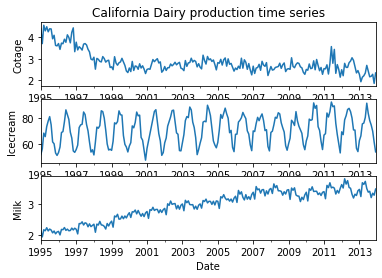

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
lactose.Cotage.plot(ax = ax1)
lactose.Icecream.plot(ax = ax2)
lactose.Milk.plot(ax = ax3)
ax1.set_ylabel('Cotage')
ax2.set_ylabel('Icecream')
ax3.set_ylabel('Milk')
ax3.set_xlabel('Date')
ax1.set_title('California Dairy production time series')

This particular analysis will focus on the `Icecream` production from the dataframe

# Analysis: Icecream Production in California

In [12]:
lactose['Icecream_log'] = np.log(lactose.Icecream)

In [13]:
def plot_ts(ts, lab = ''):
    plt.figure(figsize=(10, 4)).gca()
    ts.plot()
    plt.title('Time series plot of ' + lab, fontsize = 20)
    plt.ylabel('Value', fontsize = 15)
    plt.xlabel('Date', fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)           
    plt.grid(True)

Text(0.5, 1.0, 'California Dairy production time series')

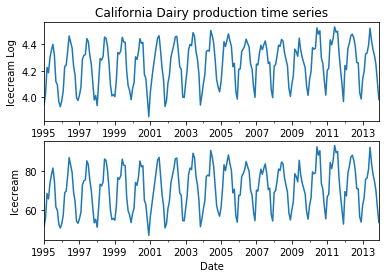

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1)
lactose.Icecream_log.plot(ax = ax1)
lactose.Icecream.plot(ax = ax2)
ax1.set_ylabel('Icecream Log')
ax2.set_ylabel('Icecream')
ax2.set_xlabel('Date')
ax1.set_title('California Dairy production time series')

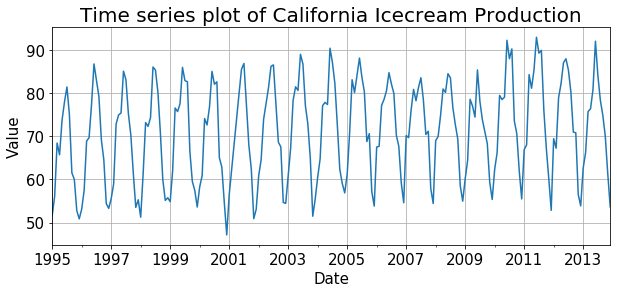

In [15]:
plot_ts(lactose.Icecream, 'California Icecream Production')

It is possible to see that the *log* of the `Icecream` production does not do much besides changing the scale of the variable. In other words the amplitude of the seasonal variation does not seem to grow with time, which indicates that we should use a *summative decomposition model*

Therefore the *log* of the variable is not needed for the analysis.

## STL Decomposition of the Variable

In [16]:
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) #, freq = freq)
    #resplot = res.plot()
    res.plot()
    plt.grid()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

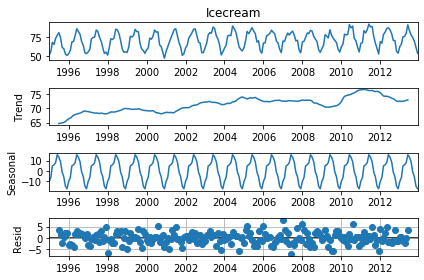

In [17]:
icecream_decomp = decomp_ts(lactose.Icecream)

Here it is possible to see a small trend and the strong seasonal effect that we have in the `Icecream` production data. The **Resid** value seems to be *Noise* as expected, without a strong seasonal or trend signal, which potentially means that the **Resid** is **STATIONARY**.

In [18]:
def DF_Test(ts):
    stationary = adfuller(ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))

DF_Test(icecream_decomp.resid[6:-6])   

D-F statistic = -10.615314403551855
p-value = 5.694807144315025e-19
number of lags used = 9
Critical value at 5% confidence = -2.8756749365852587
Critical value at 10% confidence = -2.5743041549627677


Given the DF statistic and p-value we can reject the null hypothesis that the residual is not stationary. Then the residual will be treated as **STATIONARY**.

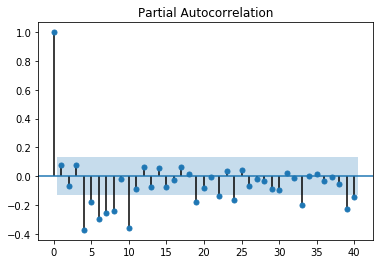

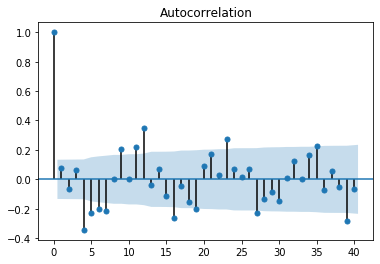

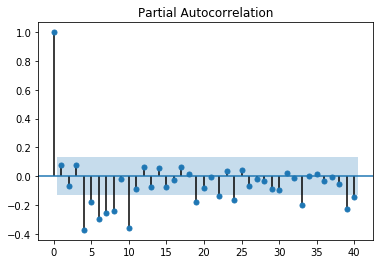

In [19]:
splt.plot_acf(icecream_decomp['1995-07-01':'2013-06-01'].resid, lags = 40)
splt.plot_pacf(icecream_decomp['1995-07-01':'2013-06-01'].resid, lags = 40)

It is possible to see that in both the ACF and PACF some significant lags greater than 0.

## Forcasting Time Series

In [20]:
from scipy.stats import zscore
#Normalizing values
lactose.loc[:, ['Month_Cnt', 'Month_Cnt2']] = lactose.loc[:, ['Month_Cnt', 'Month_Cnt2']].apply(zscore)

In [21]:
lactose['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [22]:
## Create dummy variables for the months
years = int(len(lactose.Icecream)/12)
dummies = pd.get_dummies(lactose.loc[:, 'Month'])
lactose[list(dummies.columns)] = dummies
## Print the head of the data frame to look at the dummy variables.
lactose.head(12)

,Year,Month,Cotage,Icecream,Milk,N.CA.Fat.Price,Month_Cnt,Month_Cnt2,monthNumCubed,month,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,1995,Jan,4.370,51.595,2.112,0.9803,-1.724471,-1.120740,1,1,...,0,0,1,0,0,0,0,0,0,0
1995-02-01,1995,Feb,3.695,56.086,1.932,0.8924,-1.709277,-1.120548,8,2,...,0,1,0,0,0,0,0,0,0,0
1995-03-01,1995,Mar,4.538,68.453,2.162,0.8924,-1.694084,-1.120226,27,3,...,0,0,0,0,0,1,0,0,0,0
1995-04-01,1995,Apr,4.280,65.722,2.130,0.8967,-1.678890,-1.119776,64,4,...,0,0,0,0,0,0,0,0,0,0
1995-05-01,1995,May,4.470,73.730,2.227,0.8967,-1.663696,-1.119198,125,5,...,0,0,0,0,0,0,1,0,0,0
1995-06-01,1995,Jun,4.238,77.994,2.124,0.9160,-1.648503,-1.118491,216,6,...,0,0,0,0,1,0,0,0,0,0
1995-07-01,1995,Jul,4.377,81.475,2.184,0.9160,-1.633309,-1.117656,343,7,...,0,0,0,1,0,0,0,0,0,0
1995-08-01,1995,Aug,4.368,74.981,2.152,0.8934,-1.618116,-1.116692,512,8,...,0,0,0,0,0,0,0,0,0,0
1995-09-01,1995,Sep,3.917,61.530,2.062,0.8934,-1.602922,-1.115600,729,9,...,0,0,0,0,0,0,0,0,0,1


In [48]:
lactose.head(14)

,Year,Month,Cotage,Icecream,Milk,N.CA.Fat.Price,Month_Cnt,Month_Cnt2,monthNumCubed,month,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,scores,resids
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,1995,Jan,4.370,51.595,2.112,0.9803,-1.724471,-1.120740,1,1,...,1,0,0,0,0,0,0,0,55.278012,3.683012
1995-02-01,1995,Feb,3.695,56.086,1.932,0.8924,-1.709277,-1.120548,8,2,...,0,0,0,0,0,0,0,0,59.198688,3.112688
1995-03-01,1995,Mar,4.538,68.453,2.162,0.8924,-1.694084,-1.120226,27,3,...,0,0,0,1,0,0,0,0,70.601419,2.148419
1995-04-01,1995,Apr,4.280,65.722,2.130,0.8967,-1.678890,-1.119776,64,4,...,0,0,0,0,0,0,0,0,71.580484,5.858484
1995-05-01,1995,May,4.470,73.730,2.227,0.8967,-1.663696,-1.119198,125,5,...,0,0,0,0,1,0,0,0,73.949383,0.219383
1995-06-01,1995,Jun,4.238,77.994,2.124,0.9160,-1.648503,-1.118491,216,6,...,0,0,1,0,0,0,0,0,81.327281,3.333281
1995-07-01,1995,Jul,4.377,81.475,2.184,0.9160,-1.633309,-1.117656,343,7,...,0,1,0,0,0,0,0,0,79.320346,-2.154654
1995-08-01,1995,Aug,4.368,74.981,2.152,0.8934,-1.618116,-1.116692,512,8,...,0,0,0,0,0,0,0,0,74.909022,-0.071978
1995-09-01,1995,Sep,3.917,61.530,2.062,0.8934,-1.602922,-1.115600,729,9,...,0,0,0,0,0,0,0,1,64.945587,3.415587


### Linear Regression Model

In [23]:
import sklearn.linear_model as lm
X = lactose.loc[:'2012-12-01', ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
Y = lactose.loc[:'2012-12-01', 'Icecream'].as_matrix()
lm_mod = lm.LinearRegression(fit_intercept = False)
mod_fit = lm_mod.fit(X, Y)

## and the predictions and the residual
lactose.loc[:'2012-12-01', 'scores'] = mod_fit.predict(X)
lactose.loc[:'2012-12-01', 'resids'] = lactose.loc[:'2012-12-01', 'scores'] - lactose.loc[:'2012-12-01', 'Icecream']

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


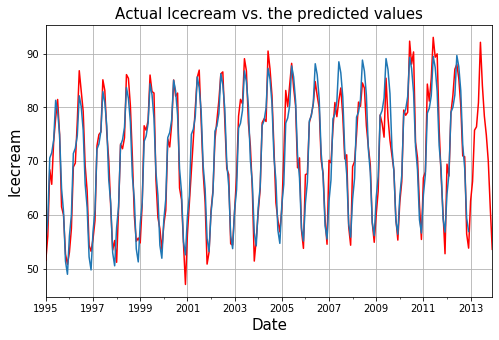

In [24]:
def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + ' vs. the predicted values', fontsize = 15) # Give the plot a main title
    ax.set_xlabel('Date',fontsize = 15) # Set text for the x axis
    ax.set_ylabel(col,fontsize = 15)# Set text for y axis
    ax.grid(True) 

plot_mod_fit(lactose, 'Icecream')   

It is possible to see that the regression from a Linear Model do quite a good job simulating the real data. (All data minus one year that would be forcast by means of an ARIMA model)

In [25]:
def RMSE(ts, score):
    from math import sqrt
    return sqrt(np.std(ts - score))

## Make the forecast for the next year
X = lactose.loc['2012-12-01':, ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
rmse_value = RMSE(lactose.loc['2012-12-01':, 'Icecream'].as_matrix(), mod_fit.predict(X))

print('The RMSE Value for the ICECREAM regression is '+ str(rmse_value))

The RMSE Value for the ICECREAM regression is 1.5459393430180413


C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


Notice that the RMSE is way smaller than the absolute value of the variable analyzed in here (`Icecream` production)

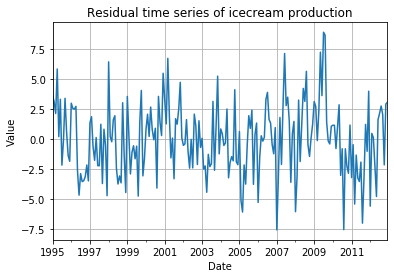

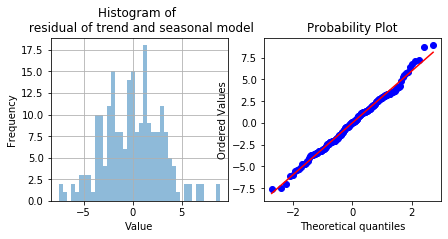

In [26]:
def plot_ts(ts, title):
    ts.plot()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True) 

plot_ts(lactose.loc[:'2012-12-01', 'resids'], title = 'Residual time series of icecream production')

def dist_ts(ts, lab = '', bins = 40):
    import scipy.stats as ss
    ## Setup a figure with two subplots side by side
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ## Plot the histogram with labels
    ts.hist(ax = ax1, bins = bins, alpha = 0.5)
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of ' + lab)
    ## Plot the q-q plot on the other axes
    ss.probplot(ts, plot = ax2)
    
dist_ts(lactose.loc[:'2012-12-01', 'resids'], '\n residual of trend and seasonal model')

The time series plot of the residual shows some minor periodic behavior. The distribution plots show the values to be close to **Normally distributed**.

In [27]:
DF_Test(lactose.loc[:'2012-12-01', 'resids'])

D-F statistic = -3.892446370847832
p-value = 0.002091146310817178
number of lags used = 15
Critical value at 5% confidence = -2.876102355
Critical value at 10% confidence = -2.574532225


Notice that the results are marginal, but still smaller than 0.05, therefore we can reject the null hypothesis at the 95% confidence level. Meaning: The time series IS **STATIONARY**.

Now, we will compute an ARIMA model for the residual using the `step_ARIMA` function we used earlier. We will train this model, without the last 12 months of data, which we will use to evaluate the model. Execute the code in the cell below to search for the best ARIMA mode order.

### ARIMA Model

In [28]:
#ARIMA model using statsmodels.tsa.arima_model
def model_ARIMA(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    print(model_fit.summary())
    return(model_fit)
#Part of previous analysis
#arima_icecream = model_ARIMA(icecream_decomp.resid[6:-6], order = (2,1,1))

In [29]:
#Step ARIMA to find the best ORDER
def model_ARIMA_2(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.arima_model import ARIMAResults    
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    BIC = ARIMAResults.bic(model_fit)
    print('Testing model of order: ' + str(order) + ' with BIC = ' + str(BIC))
    return(BIC, order, model_fit)

def step_ARIMA(resid, p_max, d_max, q_max):
    from statsmodels.tsa.arima_model import ARIMAResults    
    from statsmodels.tsa.arima_model import ARIMA
    best_BIC = 9999999999999999.0
    for p in range(p_max + 1):
        for d in range(d_max + 1):
            for q in range(q_max + 1):
                if(p > 0 or q > 0):
                    try:
                        order = (p, d, q)
                        BIC, order, model = model_ARIMA_2(resid, order)
                        if(BIC < best_BIC):
                            best_model = model
                            best_BIC = BIC
                            best_order = order
                    except: 
                        pass        
    return(best_BIC, best_order, best_model) 

In [30]:
#Variable created to get a Pandas Series for the 'Icecream' variable
Production_ice = pd.Series(lactose['Icecream'])

In [31]:
#A new package is available that could replace model_ARIMA_2 method. The method auto_arima is part of pyramid package. 
#The advantages of this package is that it can omit the errors/warning you might face during the iterative process. 
#For more details on how to use the method, please see documentation at https://www.alkaline-ml.com/pyramid/modules/generated/pyramid.arima.auto_arima.html, 
#and example on how to use at https://www.alkaline-ml.com/pyramid/quickstart.html#
#The code below could replace the code in previous cell: #Step ARIMA to find the best ORDER

from pmdarima.arima import auto_arima
#stepwise_fit = auto_arima(icecream_decomp.resid[6:-12], start_p=1, start_q=1,
stepwise_fit = auto_arima(Production_ice[6:-12], start_p=1, start_q=1,
                             max_p=3, max_q=3, max_P=3, m=12, #m -> the number of observations per cycle
                             start_P=1, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise


stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1001.701, Time=0.51 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1125.323, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1076.664, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1011.383, Time=0.16 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1012.852, Time=0.34 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1032.890, Time=0.20 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=999.886, Time=1.38 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1025.402, Time=0.58 sec
 ARIMA(1,1,1)(3,1,1)[12]             : AIC=990.367, Time=3.66 sec
 ARIMA(1,1,1)(3,1,0)[12]             : AIC=1007.868, Time=1.07 sec
 ARIMA(1,1,1)(3,1,2)[12]             : AIC=inf, Time=6.90 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=990.844, Time=2.96 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AIC=993.458, Time=1.78 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=1019.340, Time=1.54 sec
 ARIMA(2,1,1)(3,1,1)[12]    

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  210
Model:             SARIMAX(1, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -480.379
Date:                            Sun, 14 Feb 2021   AIC                            978.758
Time:                                    08:34:07   BIC                           1008.307
Sample:                                         0   HQIC                           990.720
                                            - 210                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7405      0.115     -6.459      0.000      -0.965      -0.516
ma.L1          0.2131      0.092      2.311      0.021       0.032       0.394
ma.L2         -0.6639      0.052    -12.810      0.000      -0.765      -0.562
ar.S.L12       0.4555      0.185      2.459      0.014       0.092       0.819
ar.S.L24      -0.5399      0.102     -5.313      0.000      -0.739      -0.341
ar.S.L36      -0.3648      0.107     -3.405      0.001      -0.575      -0.155
ma.S.L12      -0.9334      0.195     -4.789      0.000      -1.315      -0.551
ma.S.L24       0.6452      0.158      4.091      0.000       0.336       0.954
sigma2         6.9649      0.702      9.921      0.000       5.589       8.341
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 1.38
Prob(Q):                              0.64   Prob(JB):                         0.50
Heteroskedasticity (H):               1.51   Skew:                             0.03
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

It is possible to see that the all the Coefficients have significant correlation value (P Value smaller than 0.05)

In [32]:
# Code from Previous Analysis using step_ARIMA
#BIC, order, model_fit = step_ARIMA(lactose.loc[:'2012-12-01', 'resids'], 4, 3, 4)    
#print('Best order = ' + str(order) + ' best BIC = ' + str(BIC))

In [33]:
#arima_remainder = model_ARIMA(lactose.loc[:'2012-12-01', 'resids'], order = (0,0,3))

In [34]:
#Prediction
#start_index = len(lactose.loc[:'2012-12-01', 'resids'])
#end_index = start_index + 12
model_prediction = stepwise_fit.predict(n_periods = lactose.Icecream.shape[0])
len(model_prediction)
#len(lactose.loc[:'2012-12-01'])

228

We are now ready to compute the prediction for the last 12 months of the Icecream production time series.

In [35]:
## Make the forecast for the next year
#X = lactose.loc['2012-12-01':, ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
## and the predictions for the forecast
lactose.loc['2012-12-01':, 'scores'] =  stepwise_fit.predict(n_periods = 13) # - model_prediction[215:]

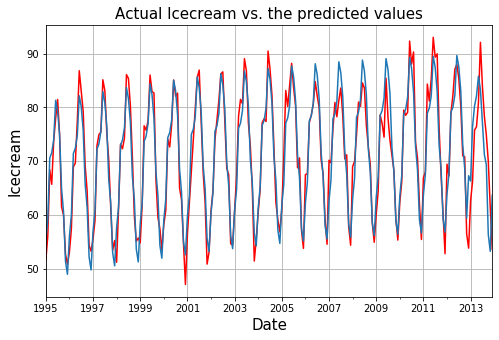

In [36]:
plot_mod_fit(lactose, 'Icecream') 

In [37]:
rmse_value2 = RMSE(lactose.loc['2012-12-01':, 'Icecream'].as_matrix(), lactose.loc['2012-12-01':, 'scores'])
print('The RMSE Value for the ICECREAM regression (ARIMA) is '+ str(rmse_value2))

The RMSE Value for the ICECREAM regression (ARIMA) is 2.9083623033128303


C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


The RMSE has improved from 1.546 to 2.535. Adding the ARIMA component to the model has not improved the prediction, which was expected as we added a forecasting in time, which even though is pretty close to the actual measurement it is expected to have the predicted (into the future) values more offset from the real value (if there are any values available as in this case). Therefore the RMSE should be impacted negatively, but not too much assuming the last forecasting is not really bad.

### Comparisons

In [38]:
Production_ice = lactose['Icecream']
Prediction_ice = lactose['scores']

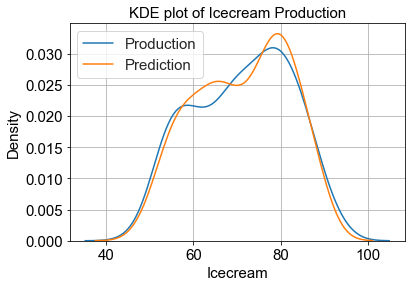

In [39]:
#Kernel Density Estimation Plots (to take a look at the Distribution for each of the variables)
import seaborn as sns
def kde_plot(a,b,c,d,e):
    fig = plt.figure(figsize=(6,4)) # Define plot area
    ax = fig.gca() # Define axis 
    sns.set_style("whitegrid")
    sns.kdeplot(a, ax = ax, label = c)
    sns.kdeplot(b, ax = ax, label = d)
    ax.set_title('KDE plot of ' + e, fontsize = 15) # Give the plot a main title
    ax.set_xlabel('Icecream', fontsize = 15) # Set text for the x axis
    ax.set_ylabel('Density', fontsize = 15)# Set text for y axis
    ax.legend(loc='upper left', fontsize=15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True) 
    
kde_plot(Production_ice,Prediction_ice,"Production","Prediction","Icecream Production")

Both distributions seems pretty similar (Prediction Vs Actual Production)

In [40]:
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)   
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.show()

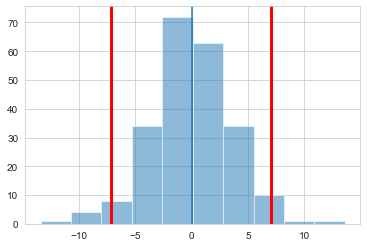

In [41]:
#diffs = pd.Series(diffs)
Delta = Production_ice - Prediction_ice
Delta =  pd.Series(Delta)
Delta = Delta.reset_index()
Delta = Delta.iloc[:,1]
#print(Delta)
plot_hist(Delta)

It is possible to see that 95% of the difference between the Prediction and the Actual Production lies between -7.5 & 7.5.

In [42]:
def t_test(a, b, alpha, alternative='two-sided'):
    import statsmodels.stats.weightstats as ws 
    diff = a.mean() - b.mean()
    res = ss.ttest_ind(a, b, equal_var=False)  
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()
    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)

In [43]:
Production_ice_log = pd.Series(np.log(lactose['Icecream']))
Production_ice_log = Production_ice_log.reset_index(drop=True)

Prediction_ice_log = pd.Series(np.log(lactose['scores']))
Prediction_ice_log = Prediction_ice_log.reset_index(drop=True)

In [44]:
t_test(Prediction_ice_log,Production_ice_log,0.05)

DegFreedom    453.294797
Difference      0.000931
Statistic       0.062747
PValue          0.949995
Low95CI        -0.028213
High95CI        0.030074
dtype: float64

From the T Test between both distributions and with an alpha value of 0.05, it is possible to see that we failed to reject the Null Hypothesis that both distributions are similar. Therefore it is possible to believe that both the **Prediction** get us close enough to the actual **Productions** values.

# Conclusions/Summary:

Quick re-cap of the analysis above:


- The Time Series for the `Icecream` production was found **STATIONARY** as the variation of the residual values do not grow over time.

- In the case of the `Icecream` Production variable which was analyzed in here, there is a strong seasonal effect. Note: This seasonal effect was expected as icecream is preferred during hotter months (around summer).

- The STL decomposition of the time series was performed with the additive model. This since the Residuals for the variable analyzed (`Icecream`) was found **STATIONARY**.

- All the coeficients from the *auto_arima* model from the pmdarima are statistically significant. Note: Installing the pmdarima package was more complicated than expected.


Regarding the Predictions:

- As saw in the plot above the *predictions* do a good job following the actual `Icecream` production values.

- The Residuals from this prediction are approximately Normally Distributed.

- The RMSE from the linear model was around 1.55 while the RMSE including the ARIMA model grew to 2.54. Which all in all is not a bad indication as both are significantly lower than the Value of the `Icecream` production variable. Also it is expecting than adding a forecast (looking into the actual future) will add some error to the Regression model that was trained with the actual data (minus the last year of the data set, which was the testing set).